In [9]:
import pandas as pd
import pypsa

In [14]:
PREFIX = "/mnt/c/Users/scl38887/Documents/git/pypsa-nz/"

# With no RE expansion limit
# path =  PREFIX + f"results/nz_endo/postnetworks/elec_s_10_ec_lc3.0_CO2L_3H_2030_0.071_AB_0export.nc"

# With RE expansion limit (all RE 0)
path =  PREFIX + f"results/nz_endo_0lim/postnetworks/elec_s_10_ec_lc3.0_CO2L_3H_2030_0.071_AB_0export.nc"

In [15]:
n = pypsa.Network(path)

Index(['H2 pipeline NZ.15_1 -> NZ.17_1', 'H2 pipeline NZ.17_1 -> NZ.1_1',
       'H2 pipeline NZ.1_1 -> NZ.11_1'],
      dtype='object', name='name')
Index(['H2 pipeline NZ.15_1 -> NZ.17_1', 'H2 pipeline NZ.17_1 -> NZ.1_1',
       'H2 pipeline NZ.1_1 -> NZ.11_1'],
      dtype='object', name='name')
INFO:pypsa.io:Imported network elec_s_10_ec_lc3.0_CO2L_3H_2030_0.071_AB_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


### Check export behavior

In [4]:
# H2 export load: total quantity and timeseries

In [5]:
dispatch = n.statistics.dispatch()
threshold = 1e6
dispatch[dispatch<-threshold]

component  carrier                             
Load       AC                                     -2.264512e+07
           agriculture electricity                -3.124443e+06
           agriculture oil                        -3.184172e+06
           gas for industry                       -2.369851e+07
           industry electricity                   -1.881263e+07
           kerosene for aviation                  -2.464275e+07
           land transport oil                     -7.260053e+07
           low-temperature heat for industry      -1.887204e+06
           naphtha for industry                   -7.050273e+06
           residential biomass                    -2.349411e+06
           residential gas                        -1.900759e+06
           services electricity                   -1.431506e+07
           services gas                           -2.209115e+06
           services oil                           -1.301348e+06
           shipping oil                           -4.989

In [ ]:
dispatch = n.statistics.dispatch()
threshold = 1e6
dispatch[dispatch<-threshold]

component  carrier                             
Load       AC                                     -2.264512e+07
           agriculture electricity                -3.124443e+06
           agriculture oil                        -3.184172e+06
           gas for industry                       -2.369851e+07
           industry electricity                   -1.881263e+07
           kerosene for aviation                  -2.464275e+07
           land transport oil                     -7.260053e+07
           low-temperature heat for industry      -1.887204e+06
           naphtha for industry                   -7.050273e+06
           residential biomass                    -2.349411e+06
           residential gas                        -1.900759e+06
           services electricity                   -1.431506e+07
           services gas                           -2.209115e+06
           services oil                           -1.301348e+06
           shipping oil                           -4.989

In [30]:
n.generators_t.p.loc[:,"H2 export load"].sum() * n.snapshot_weightings.generators[0] / 1e6 # in TWh

877.9648946812578

<AxesSubplot:xlabel='snapshot'>

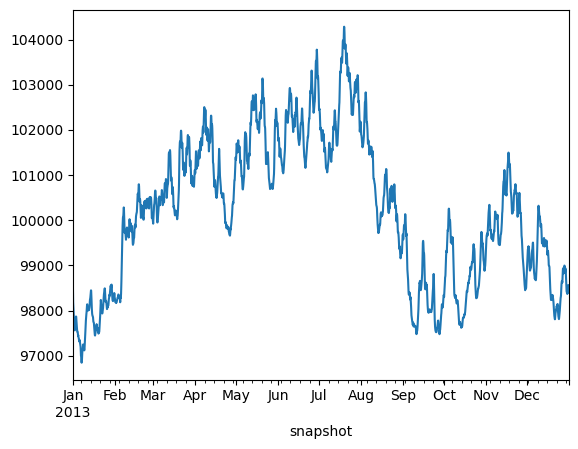

In [32]:
n.generators_t.p.loc[:,"H2 export load"].plot()

### Total costs, revenue and objective value

In [37]:
rev = n.statistics.revenue()
threshold = 1e8
rev[rev<-threshold]

component  carrier                     
Load       AC                             -3.607304e+09
           agriculture electricity        -5.356231e+08
           agriculture oil                -1.592393e+08
           gas emissions                  -3.487356e+08
           gas for industry               -3.679596e+09
           industry coal emissions        -1.702486e+09
           industry electricity           -3.297476e+09
           industry oil emissions         -7.777089e+08
           kerosene for aviation          -1.232376e+09
           land transport fuel cell       -1.011653e+08
           land transport oil             -3.630727e+09
           land transport oil emissions   -8.008495e+09
           naphtha for industry           -3.525819e+08
           oil emissions                  -1.180840e+09
           process emissions              -7.346157e+08
           residential biomass            -2.305930e+08
           residential gas                -1.187844e+08
        

### Check RE expansion

In [8]:
n.statistics.expanded_capacity(comps=["Generator"]) / 1e3 # in GW

component  carrier                                  
Generator  Coal                                           0.000000
           Combined-Cycle Gas                             0.000000
           Geothermal                                     0.000000
           H2                                           104.283883
           Offshore Wind (AC)                             2.862280
           Offshore Wind (DC)                            19.545018
           Oil                                            0.000000
           Onshore Wind                                 239.419877
           Open-Cycle Gas                                58.593911
           Run of River                                   0.000000
           Solar                                        356.353802
           gas                                            0.740422
           residential rural solar thermal                0.000043
           residential urban decentral solar thermal      0.000043
         

In [16]:
n.carriers

,co2_emissions,color,nice_name,max_growth,max_relative_growth
Carrier,,,,,
CCGT,0.187,#b20101,Combined-Cycle Gas,inf,0.0
geothermal,0.026,#ba91b1,Geothermal,inf,0.0
nuclear,0.000,#ff9000,Nuclear,inf,0.0
lignite,0.334,#9e5a01,Lignite,inf,0.0
OCGT,0.187,#d35050,Open-Cycle Gas,inf,0.0
biomass,0.000,#0c6013,Biomass,inf,0.0
coal,0.354,#707070,Coal,inf,0.0
oil,0.000,#262626,Oil,inf,0.0
hydro,0.000,#08ad97,Reservoir & Dam,inf,0.0


In [20]:
n.investment_periods

Index([], dtype='int64', name='name')

In [22]:
n.set_investment_periods(periods=[2030])

INFO:pypsa.components:Repeating time-series for each investment period and converting snapshots to a pandas.MultiIndex.


In [27]:
n._multi_invest

not multi_invest


In [29]:
n.objective / 1e11

-2.107404854121696